# Import modules

In [1]:
from Model import *
from utilities import *
from  sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import preprocessing
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer
import warnings
warnings.filterwarnings("ignore")

C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\

# Building the dataset

In [2]:
def get_dat(data_num):
    if data_num == 1:
        F_0 = np.load("./bearingset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T1_source_label.npy")
        Y_1 = np.load("./bearingset/data/T1_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 2:
        F_0 = np.load("./bearingset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T2_source_label.npy")
        Y_1 = np.load("./bearingset/data/T2_target_label.npy")
        Label_Name =["1-OSF","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 3:
        F_0 = np.load("./bearingset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T3_source_label.npy")
        Y_1 = np.load("./bearingset/data/T3_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","5-IRF","Unknown"]
    if data_num == 4:
        F_0 = np.load("./bearingset/data/T4_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T4_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T4_source_label.npy")
        Y_1 = np.load("./bearingset/data/T4_target_label.npy")
        Label_Name =["1-OSF","4-ISF","6-IORF","8-H","Unknown"]
    if data_num == 5:
        F_0 = np.load("./gearset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T1_source_label.npy")
        Y_1 = np.load("./gearset/data/T1_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 6:
        F_0 = np.load("./gearset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T2_source_label.npy")
        Y_1 = np.load("./gearset/data/T2_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 7:
        F_0 = np.load("./gearset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T3_source_label.npy")
        Y_1 = np.load("./gearset/data/T3_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    F_0=torch.from_numpy(F_0.astype(np.float32))
    F_1=torch.from_numpy(F_1.astype(np.float32))
    Y_0=torch.from_numpy(Y_0.astype(np.float32))
    Y_1=torch.from_numpy(Y_1.astype(np.float32))
    data_0 = Data.TensorDataset(F_0,Y_0)
    data_1 = Data.TensorDataset(F_1,Y_1)
    return data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name
def Split(full_dataset):
    test_size = 200
    train_size = len(full_dataset) - test_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    return train_dataset, test_dataset

# Model 

## Model defination

In [3]:
def step_1(source_loader, target_loader,net,G_D,data_num):
    step = 0
    acc = 0
    while step <150:
        for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):
            fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
            ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
            coarse_source = G_D.forward(fs1)
            coarse_target = G_D.forward(ft1)
            # =========================loss function
            ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
            d1 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),coarse_source.cuda())
            with OptimizerManager([optimizer_G_F,optimizer_G_C, optimizer_G_D]):
                loss = ce + d1  
                loss.backward()
            step += 1


            if step % 10 == 1:
                acc_test = accuracy_score(np.argmax(predict_prob_target.cpu().detach().numpy(),axis = -1),
                                          np.argmax(label_target.cpu().detach().numpy(),axis = -1))
                if acc_test>=acc:
                    acc = acc_test
                    torch.save(net.state_dict(), './models/Compared_Methods_IW_OSDA_net.pkl')
                    torch.save(G_D.state_dict(), './models/Compared_Methods_IW_OSDA_D.pkl')
                    torch.save(G_F.state_dict(), './models/Compared_Methods_IW_OSDA_F.pkl')
                    best_net_path ='./models/Compared_Methods_IW_OSDA_net.pkl'
                    best_G_D_path = './models/Compared_Methods_IW_OSDA_D.pkl'
    return best_net_path,best_G_D_path
def step_2(best_net_path,best_G_D_path,batch,minibatch,source_loader,target_loader,data_num):
    net.load_state_dict(torch.load(best_net_path))
    G_D.load_state_dict(torch.load(best_G_D_path))
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    step=0
    acc = 0
    while step <20:
        for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):        
            fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
            ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
            p0 = G_D.forward(fs1)
            pred= G_D.forward(ft1)
            p1_confidence = torch.max(pred,axis = 1).values
            p1_norm = (p1_confidence - torch.min(p1_confidence))/(torch.max(p1_confidence)-torch.min(p1_confidence)+1e-4)

            known = torch.sort(torch.tensor(p1_norm).cuda().detach(),dim = 0)[1][-(40-minibatch):]
            unknown = torch.sort(torch.tensor(p1_norm).cuda().detach(),dim = 0)[1][0:minibatch]
            feature_unknown = torch.index_select(ft1, 0, unknown)
            feature_known = torch.index_select(ft1, 0, known)
            _,_,pred_unknown = O.forward(feature_unknown)
            _,_,pred_known = O.forward(feature_known)
            _, __, predict_prob_otherep = G_C.forward(feature_unknown)
            ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
            d1 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),p0.cuda())
            d2 = BCELossForMultiClassification(Variable(torch.from_numpy(np.concatenate((np.ones((minibatch,1)), np.zeros((minibatch,1))), axis = -1).astype('float32'))).cuda(),pred_unknown)
            d2 += BCELossForMultiClassification(Variable(torch.from_numpy(np.concatenate((np.zeros((40-minibatch,1)), np.ones((40-minibatch,1))), axis = -1).astype('float32'))).cuda(),pred_known)        
            ce_ep = CrossEntropyLoss(Variable(torch.from_numpy(np.concatenate((np.zeros((minibatch,num_class)), np.ones((minibatch,1))), axis = -1).astype('float32'))).cuda(),predict_prob_otherep)        
            with OptimizerManager([optimizer_G_F,optimizer_G_C, optimizer_G_D, optimizer_O, optimizer_D]):
                loss =  ce + 0.15* d1 + 0.15*d2 + 0.1*ce_ep
                loss.backward()            
            acc_test = accuracy_score(np.argmax(predict_prob_target.cpu().detach().numpy(),axis = -1),
                                      np.argmax(label_target.cpu().detach().numpy(),axis = -1))            
            if acc_test>=acc:
                acc = acc_test

                torch.save(O.state_dict(),'./models/Compared_Methods_IW_OSDA_O.pkl')
                torch.save(net.state_dict(), './models/Compared_Methods_IW_OSDA_net.pkl')
                torch.save(G_D.state_dict(),'./models/Compared_Methods_IW_OSDA_D.pkl')

            step += 1
    O_path =  './models/Compared_Methods_IW_OSDA_O.pkl'
    G_D_path =  './models/Compared_Methods_IW_OSDA_D.pkl'
    net_path = './models/Compared_Methods_IW_OSDA_net.pkl'
    return net_path,G_D_path,O_path
def step_3(source_loader,target_loader,minibatch,net_path,O_path,G_D_path,data_num):
    net.load_state_dict(torch.load(net_path))
    G_D.load_state_dict(torch.load(G_D_path))
    O.load_state_dict(torch.load(O_path))
    k=0
    acc = 0
    while k <20:
        for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):         
            fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
            ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
            domain_prob_discriminator_1_source = D.forward(fs1)
            domain_prob_discriminator_1_target = D.forward(ft1)

            pred= G_D.forward(ft1)
            p1_confidence = torch.max(pred,axis = 1).values
            w1_norm = (p1_confidence - torch.min(p1_confidence))/(torch.max(p1_confidence)-torch.min(p1_confidence)+1e-4)

            _,_,dptarget = O.forward(ft1.detach())
            A = dptarget[:,1].cpu().detach().numpy()
            A = Variable(torch.tensor(A).cuda())
            ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
            known = torch.sort(dptarget[:,1].detach(),dim =0)[1][-minibatch:]
            unknown = torch.sort(dptarget[:,1].detach(),dim =0)[1][0:minibatch]
            feature_unknown = torch.index_select(ft1, 0, unknown)
            feature_known = torch.index_select(ft1, 0, known)
            _,_,pred_unknown = O.forward(feature_unknown)
            _,_,pred_known = O.forward(feature_known)
            _, __, predict_prob_otherep = G_C.forward(feature_unknown)
            ce_ep = CrossEntropyLoss(Variable(torch.from_numpy(np.concatenate((np.zeros((minibatch,num_class)), np.ones((minibatch,1))), axis = -1).astype('float32'))).cuda(),predict_prob_otherep)
            adv_loss = BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_source), predict_prob=domain_prob_discriminator_1_source )
            adv_loss += BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_target), predict_prob=1 - domain_prob_discriminator_1_target, instance_level_weight =w1_norm)
            entropy = EntropyLoss(predict_prob_target, instance_level_weight= dptarget[:,0].contiguous())

            with OptimizerManager([optimizer_G_F,optimizer_G_C,optimizer_D]):
                loss = ce +0.1*adv_loss + 0.1*ce_ep + 0.1*entropy
                loss.backward()

            acc_test = accuracy_score(np.argmax(predict_prob_target.cpu().detach().numpy(),axis = -1),
                                      np.argmax(label_target.cpu().detach().numpy(),axis = -1))            
            if acc_test>=acc:
                acc = acc_test
                torch.save(O.state_dict(), './models/Compared_Methods_IW_OSDA_O.pkl')
                torch.save(net.state_dict(), './models/Compared_Methods_IW_OSDA_net.pkl')
            k += 1
        final_net_path = './models/Compared_Methods_IW_OSDA_O.pkl'
        final_O_path = './models/Compared_Methods_IW_OSDA_net.pkl'
    return final_net_path,final_O_path

## Model initialization

In [4]:
data_num = 1
data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name = get_dat(data_num)
Train_0,Test_0 = Split(data_0)
Train_1,Test_1 = Split(data_1)
source_loader=Data.DataLoader(dataset=Train_0,batch_size=40,shuffle=True,num_workers=0)
target_loader=Data.DataLoader(dataset=Train_1,batch_size=40,shuffle=True,num_workers=0)
source_loader1=Data.DataLoader(dataset=Test_0,batch_size=40,shuffle=True,num_workers=0)
target_loader1=Data.DataLoader(dataset=Test_1,batch_size=40,shuffle=True,num_workers=0)
num_class = Y_0.shape[1]-1

O = CLS_0(1024,2).cuda()
G_D = Discriminator(n = Y_0.shape[1]-1).cuda()
G_F = CNN_2D().cuda()
G_C = CLS(1024, Y_0.shape[1]).cuda()
net = nn.Sequential(G_F, G_C).cuda()
D = LargeAdversarialNetwork(1024).cuda()

## Model training

In [5]:
batch = 40
minibatch = 1
scheduler = lambda step, initial_lr : inverseDecaySheduler(step, initial_lr, gamma=10, power=0.75, max_iter=10000)
optimizer_O = OptimWithSheduler(optim.Adam(O.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_D = OptimWithSheduler(optim.Adam(G_D.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_F = OptimWithSheduler(optim.Adam(G_F.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_C = OptimWithSheduler(optim.Adam(G_C.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_D = OptimWithSheduler(optim.Adam(D.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)
warnings.filterwarnings("ignore")
src_net_path,src_G_D_path = step_1(source_loader,target_loader,net,G_D,data_num)
net_path,G_D_path,O_path = step_2(src_net_path,src_G_D_path,batch,minibatch,source_loader, target_loader,data_num)
final_net_path,final_O_path = step_3(source_loader,target_loader,minibatch,net_path,O_path,G_D_path,data_num)

# Performance visualization

## The confusion matrix

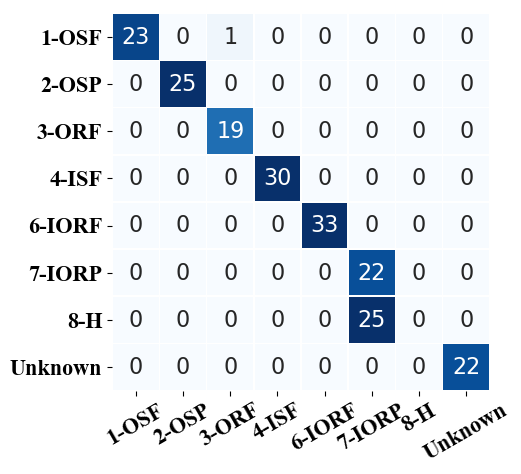

In [6]:
net_path = './models/Compared_Methods_IW_OSDA_net.pkl'
net.load_state_dict(torch.load(net_path))

True_label = []
Pred_Label = []
for (i, (im, label)) in enumerate(target_loader1):

    ss, _,  predict_prob = net.forward(im.cuda())
    
    label = np.argmax(label, axis=-1).reshape(-1, 1)
    predict_index = np.argmax(predict_prob.cpu().detach().numpy(), axis=-1).reshape(-1, 1)
    
    True_label.append(np.array(label.flatten()))
    Pred_Label.append(np.array(predict_index.flatten()))

y_true = np.array(True_label).reshape((200,))
y_pred = np.array(Pred_Label).reshape((200,))

m = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(5,5),dpi=100)
ax= sns.heatmap(m,vmin=0, vmax=25,cmap='Blues',annot=True,fmt='',linewidths=.5,square=True,cbar=None,annot_kws={"size":16})
plt.xticks(fontsize= 16, fontfamily= "Times New Roman")                      
plt.yticks(fontsize= 16, fontfamily= "Times New Roman") 
plt.margins(0, 0)
ax.set_xticklabels(Label_Name,rotation=30)
ax.set_yticklabels(Label_Name,rotation=0)

plt.margins(0, 0)

## The accuracy

In [7]:
pred_y = []
true_y = []
NUM_CLASSES = Y_1.shape[1]
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(target_loader1):
        data, target = data.cuda(), target.cuda(non_blocking=True)
        ss, _,  predict_prob = net(data)
        pred = predict_prob.max(1, keepdim=True)[1] 
        for i in range(len(pred)):
            pred_y.append(pred[i].item())
            true_y.append(torch.argmax(target[i]).item())
a,b = utils.cal_acc(true_y, pred_y, NUM_CLASSES)
print("The accuracy on all the known classes: "+str(a))
print("The accuracy on all the target classes: "+str(b))

The accuracy on all the known classes: 0.87
The accuracy on all the target classes: 0.8539325842696629
